# Exploratory Data Analysis

Since we've completed the extraction and transformation of our dataset, our next step is to actually explore it and analyze it. We'll keep in mind our client's goal for us which is, to identify the 5 best zip codes to invest in.

Some things we'll want to inspect are:

- The overall market trend across all zip codes
- The State wide market trend
- The yearly median market growth

In [1]:
# import libaries
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode

import ipywidgets

%matplotlib inline
sns.set(font_scale=1.2)
init_notebook_mode(connected=True)

In [2]:
# load data
df = pd.read_csv("../data/interim/data.csv.xz", index_col=0, parse_dates=["Date"])
df.head()

,RegionID,RegionName,City,State,CountyName,SizeRank,Date,value
0,84654,60657,Chicago,IL,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,5,1996-04-01,77300.0


In [3]:
# output df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3627055 entries, 0 to 3627054
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionID    int64         
 1   RegionName  int64         
 2   City        object        
 3   State       object        
 4   CountyName  object        
 5   SizeRank    int64         
 6   Date        datetime64[ns]
 7   value       float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 249.1+ MB


## Market Trend over Time

Market trend over time will show us if there is a distinct increase or decrease in the median value of homes historically.

In [4]:
# pivot the data
zip_df = df.pivot(index="Date", columns="RegionName", values="value")
zip_df.head()

RegionName,1001,1002,1005,1007,1008,1010,1011,1013,1020,1026,...,99654,99664,99669,99701,99705,99709,99712,99801,99835,99901
Date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,113100.0,161000.0,103100.0,133400.0,117500.0,115800.0,87000.0,88500.0,97200.0,91200.0,...,122700.0,112200.0,112500.0,89400.0,101900.0,103000.0,109200.0,166800.0,155500.0,117100.0
1996-05-01,112800.0,160100.0,103400.0,132700.0,117300.0,115700.0,87000.0,88500.0,97100.0,91100.0,...,124200.0,112400.0,113100.0,89800.0,102900.0,103900.0,109600.0,166200.0,154900.0,117200.0
1996-06-01,112600.0,159300.0,103600.0,132000.0,117100.0,115500.0,87100.0,88400.0,97000.0,91000.0,...,125700.0,112600.0,113800.0,90200.0,103800.0,104700.0,110000.0,165400.0,154200.0,117300.0
1996-07-01,112300.0,158600.0,103800.0,131400.0,117000.0,115300.0,87200.0,88300.0,96800.0,90800.0,...,127200.0,112800.0,114400.0,90600.0,104700.0,105500.0,110400.0,164400.0,153500.0,117400.0
1996-08-01,112100.0,158000.0,103900.0,130800.0,116800.0,115100.0,87400.0,88200.0,96600.0,90700.0,...,128600.0,113000.0,115100.0,91000.0,105400.0,106200.0,110800.0,163500.0,152800.0,117500.0


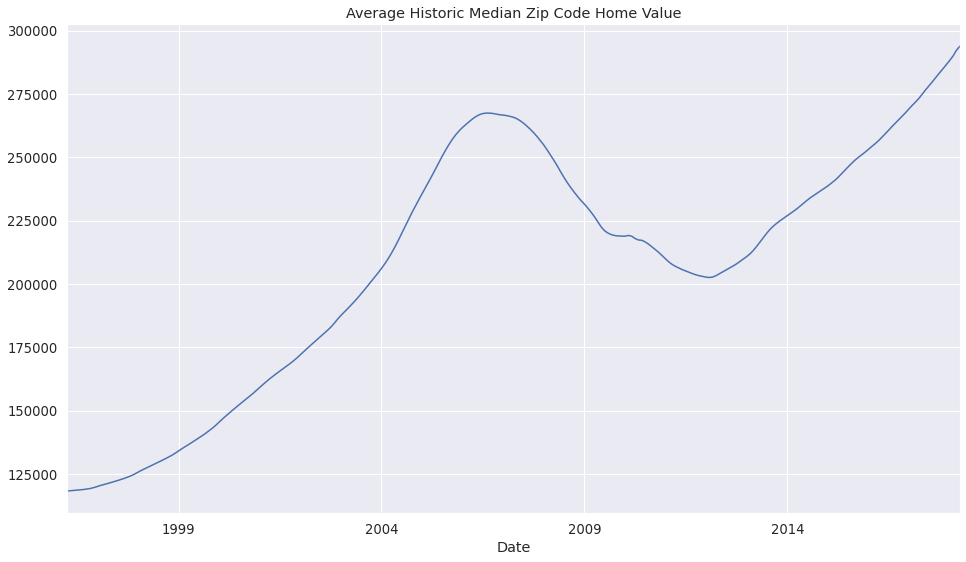

In [5]:
# find the mean of values at each point in time and plot it
zip_df.mean(axis=1).plot(figsize=(16, 9), title="Average Historic Median Zip Code Home Value")
plt.show()

Looking at this visualization the most distinct thing is the camel hump between the 2004 and 2009 time range. This rapid increase in median home values, and the subsequent dramatic decrease coincides with the 2007-2008 economic collapse.

> The financial crisis of 2007–2008, also known as the global financial crisis, was a severe worldwide financial crisis. Excessive risk-taking by banks combined with the bursting of the United States housing bubble caused the values of securities tied to U.S. real estate to plummet, damaging financial institutions globally. - Wikipedia

Overall there is an average net increase historically, with periods of decrease but that is fine. When we do our modeling it will be interesting to see the variation amongst all the zip codes.

## State Market Trend over Time

In [6]:
# plot the average state market trend over time
fig = px.line(
    df.pivot_table(values="value", index="Date", columns="State", aggfunc="median"),
    title="Historic Median Zip Code Value by State",
)
fig.show()

We can see from this plot that some States experienced the economic collapse more than others, specifically States like Hawaii, California, and DC. They've also experienced the most historic gain in market value between 1996 and 2018.

We have over 13k zip codes in our data, making that many models would be quite the hassle. It would be best if we subset our data in some way. We can try to identify which States have minimized their year over year risk, while also returning a size able profit.

## Low Risk, High Opportunity

Which State had the lowest risk year over year.

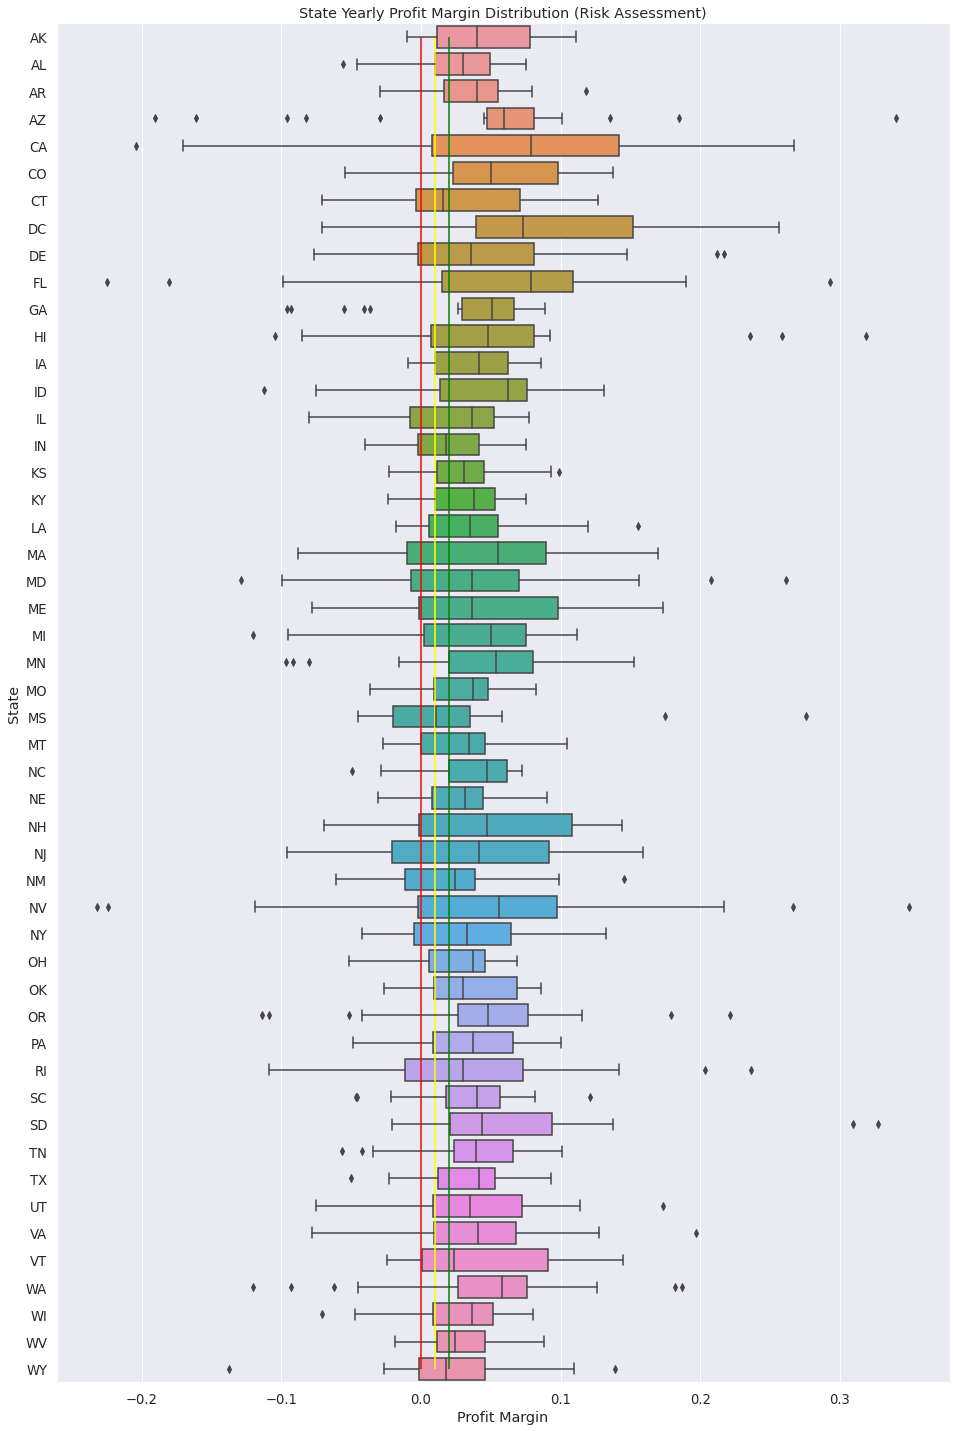

In [7]:
# groupby year for each zip code and find the yearly profit margin
state_df = df.pivot_table(values="value", index="Date", columns="State", aggfunc="median").resample("A").median()
yrly_risk = state_df.diff() / state_df.shift()

plt.figure(figsize=(16, 25))
sns.boxplot(x="value", y="State", data=pd.melt(yrly_risk))
plt.title("State Yearly Profit Margin Distribution (Risk Assessment)")
plt.xlabel("Profit Margin")
plt.vlines(0, 0, 49, colors="red")
plt.vlines(.01, 0, 49, colors="yellow")
plt.vlines(.02, 0, 49, colors="green")

plt.show()

This graphic shows the distribution of yearly profit margins if you bought a home valued at the state median. The reason this is important is it gives us a reference of the risk attached to any particular state. On the graphic there are 3 solid colored vertical lines for reference. The best cast scenario is if a state's IQR is above the green line with no outliers (or outliers above the green line). That would mean that a State has a history of resulting in a net positive profit margin of atleast 2%, for 75% of the years we have data for.

We can gather from this boxplot comparison that each State has inherent risk of dipping into the negatives for profit margin, however some states minimize that very well. For example SD, DC, CO. Of those 3 states it isn't unusual to see CO, or DC achieve profit margins above 10%.

In [8]:
# compare the states of CO and DC in the last year
state_2018 = df.set_index("Date").loc["2018", ["State", "value"]]

fig = px.histogram(
    state_2018.loc[state_2018.State.isin(["DC", "CO"])],
    x="value",
    color="State",
    title="2018 Median Home Value of Zip Codes"
)
fig.show()

We can see here that just based off of 2018 data, there is more opportunity in CO then there is in DC. This is due to the fact that CO dwarfs DC in the amount of lower cost homes, giving our client the opportunity to purchase more properties with the same amount of capital.

For the rest of our EDA and modeling we'll look into CO at an attempt to see which zip codes to recommend to our client. 

## Colorado

Since we know what state we want to invest in, we should inspect a little more to get a grasp of what we will be modeling.

In [9]:
# how many unique zip codes, counties, cities
co_df = df[df.State == "CO"]
co_df.nunique()

RegionID       247
RegionName     247
City           141
State            1
CountyName      29
SizeRank       247
Date           265
value         6502
dtype: int64

In [10]:
# what does the market trend look like for each county in CO
fig = px.line(
    co_df.pivot_table("value", "Date", "CountyName"),
    title="Colorado Counties Market Trend"
)
fig.show()

Woah it's interesting to see that 1 county alone dwarfs the rest of them, and most likely would've pulled the mean value of CO up if we had used mean as our aggregate function instead of median.

Let's view the risk associated with each county similar to our state risk assessment.

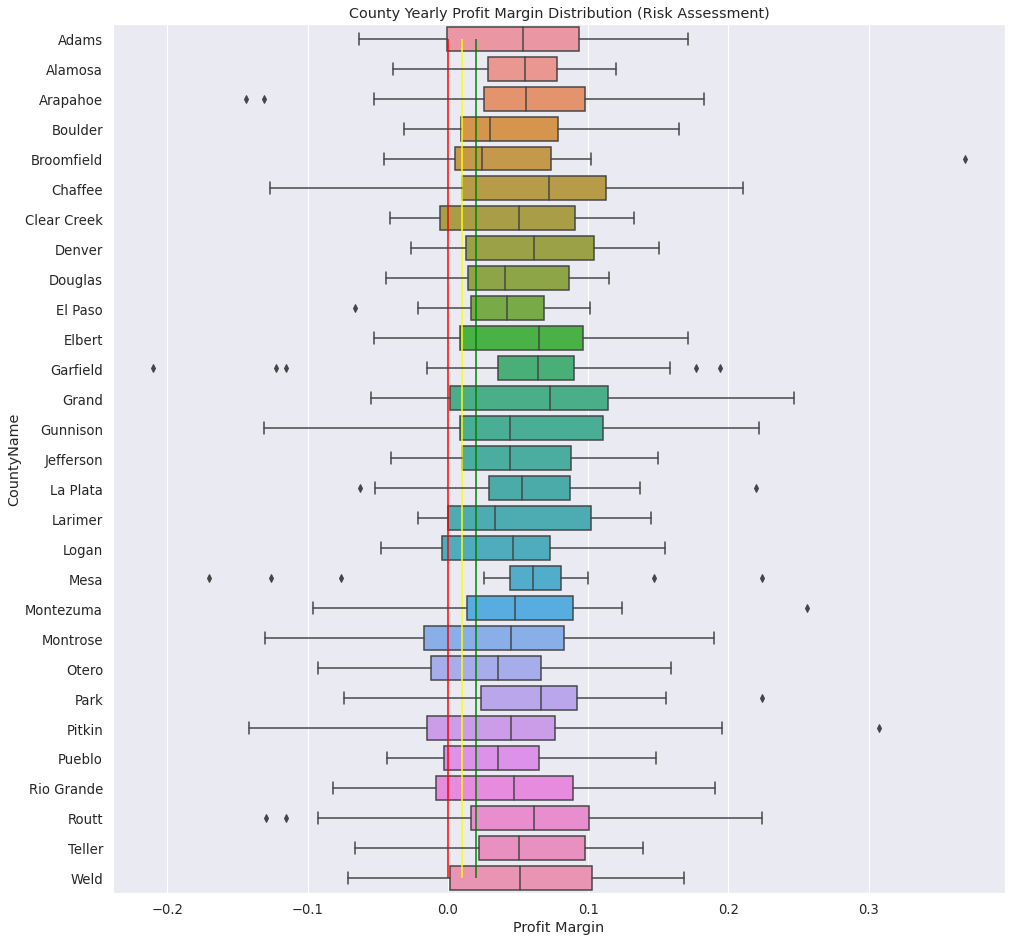

In [11]:
# groupby year for each zip code and find the yearly profit margin
co_county_df = co_df.pivot_table(values="value", index="Date", columns="CountyName", aggfunc="median").resample("A").median()
yrly_risk = co_county_df.diff() / co_county_df.shift()

plt.figure(figsize=(16, 16))
sns.boxplot(x="value", y="CountyName", data=pd.melt(yrly_risk))
plt.title("County Yearly Profit Margin Distribution (Risk Assessment)")
plt.xlabel("Profit Margin")
plt.vlines(0, 0, 28, colors="red")
plt.vlines(.01, 0, 28, colors="yellow")
plt.vlines(.02, 0, 28, colors="green")

plt.show()

Looking at the County wise risk assessment a few counties stand out in particular, namely Grand, Gunnison, Chafee, due to their wider distribution. The wider IQR and whiskers indicates the larger profit margin ranges that these areas are capable of.

We could subset our data again for modeling and restrict ourselves to a couple of counties. With a state of 240+ zip codes to model, it may be best to reduce the number of regions to model to 100 (an arbitrary round number). We can determine which zip codes to analyze from the risk associated with them, by balancing out our recommendation to our client. We can choose 8 counties, 4 high risk, 4 low risk.

- High Risk
  - Adams
  - Chafee
  - Gunnison
  - Grand
- Low Risk
  - Alamosa
  - Park
  - Teller
  - Denver

In [12]:
# subset counties
counties = ["Chaffee", "Gunnison", "Grand", "Alamosa", "Park", "Teller", "Denver", "Adams"]
counties_df = co_df[co_df.CountyName.isin(counties)]
counties_df.nunique()

RegionID        61
RegionName      61
City            29
State            1
CountyName       8
SizeRank        61
Date           265
value         4426
dtype: int64

Now we have 61 unique zip codes to work with within the State of Colorado. We'll export the data and get started with modeling.

In [13]:
# export data
counties_df.to_csv("../data/interim/co-data.csv", index=False)